<a href="https://colab.research.google.com/github/aamir2392/Artificial_Intelligence/blob/main/AI_Lab_week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# csp.py
# From Classic Computer Science Problems in Python Chapter 3
# Copyright 2018 David Kopec
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
from typing import Generic, TypeVar, Dict, List, Optional
from abc import ABC, abstractmethod

V = TypeVar('V') # variable type
D = TypeVar('D') # domain type


# Base class for all constraints
class Constraint(Generic[V, D], ABC):
    # The variables that the constraint is between
    def __init__(self, variables: List[V]) -> None:
        self.variables = variables

    # Must be overridden by subclasses
    @abstractmethod
    def satisfied(self, assignment: Dict[V, D]) -> bool:
        ...


# A constraint satisfaction problem consists of variables of type V
# that have ranges of values known as domains of type D and constraints
# that determine whether a particular variable's domain selection is valid
class CSP(Generic[V, D]):
    def __init__(self, variables: List[V], domains: Dict[V, List[D]]) -> None:
        self.variables: List[V] = variables # variables to be constrained
        self.domains: Dict[V, List[D]] = domains # domain of each variable
        self.constraints: Dict[V, List[Constraint[V, D]]] = {}
        for variable in self.variables:
            self.constraints[variable] = []
            if variable not in self.domains:
                raise LookupError("Every variable should have a domain assigned to it.")

    def add_constraint(self, constraint: Constraint[V, D]) -> None:
        for variable in constraint.variables:
            if variable not in self.variables:
                raise LookupError("Variable in constraint not in CSP")
            else:
                self.constraints[variable].append(constraint)

    # Check if the value assignment is consistent by checking all constraints
    # for the given variable against it
    def consistent(self, variable: V, assignment: Dict[V, D]) -> bool:
        for constraint in self.constraints[variable]:
            if not constraint.satisfied(assignment):
                return False
        return True

    def backtracking_search(self, assignment: Dict[V, D] = {}) -> Optional[Dict[V, D]]:
        # assignment is complete if every variable is assigned (our base case)
        if len(assignment) == len(self.variables):
            return assignment

        # get all variables in the CSP but not in the assignment
        unassigned: List[V] = [v for v in self.variables if v not in assignment]

        # get the every possible domain value of the first unassigned variable
        first: V = unassigned[0]
        for value in self.domains[first]:
            local_assignment = assignment.copy()
            local_assignment[first] = value
            # if we're still consistent, we recurse (continue)
            if self.consistent(first, local_assignment):
                result: Optional[Dict[V, D]] = self.backtracking_search(local_assignment)
                # if we didn't find the result, we will end up backtracking
                if result is not None:
                    return result
        return None


# **Australian MAP COLORING using GA**


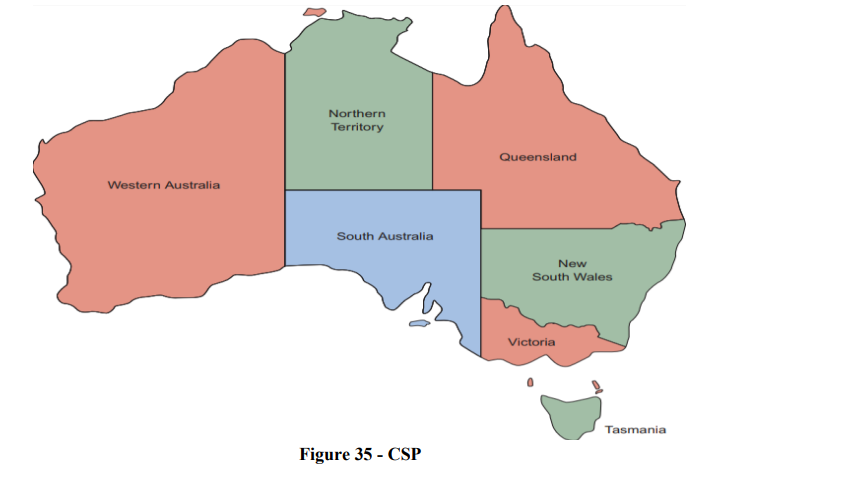

In [11]:
# map_coloring.py
# From Classic Computer Science Problems in Python Chapter 3
# Copyright 2018 David Kopec
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#from csp import Constraint, CSP
from typing import Dict, List, Optional


class MapColoringConstraint(Constraint[str, str]):
    def __init__(self, place1: str, place2: str) -> None:
        super().__init__([place1, place2])
        self.place1: str = place1
        self.place2: str = place2

    def satisfied(self, assignment: Dict[str, str]) -> bool:
        # If either place is not in the assignment then it is not
        # yet possible for their colors to be conflicting
        if self.place1 not in assignment or self.place2 not in assignment:
            return True
        # check the color assigned to place1 is not the same as the
        # color assigned to place2
        return assignment[self.place1] != assignment[self.place2]


if __name__ == "__main__":
    variables: List[str] = ["Western Australia", "Northern Territory", "South Australia",
                            "Queensland", "New South Wales", "Victoria", "Tasmania"]
    domains: Dict[str, List[str]] = {}
    for variable in variables:
        domains[variable] = ["red", "green", "blue"]
    csp: CSP[str, str] = CSP(variables, domains)
    csp.add_constraint(MapColoringConstraint("Western Australia", "Northern Territory"))
    csp.add_constraint(MapColoringConstraint("Western Australia", "South Australia"))
    csp.add_constraint(MapColoringConstraint("South Australia", "Northern Territory"))
    csp.add_constraint(MapColoringConstraint("Queensland", "Northern Territory"))
    csp.add_constraint(MapColoringConstraint("Queensland", "South Australia"))
    csp.add_constraint(MapColoringConstraint("Queensland", "New South Wales"))
    csp.add_constraint(MapColoringConstraint("New South Wales", "South Australia"))
    csp.add_constraint(MapColoringConstraint("Victoria", "South Australia"))
    csp.add_constraint(MapColoringConstraint("Victoria", "New South Wales"))
    csp.add_constraint(MapColoringConstraint("Victoria", "Tasmania"))
    solution: Optional[Dict[str, str]] = csp.backtracking_search()
    if solution is None:
        print("No solution found!")
    else:
        print(solution)


{'Western Australia': 'red', 'Northern Territory': 'green', 'South Australia': 'blue', 'Queensland': 'red', 'New South Wales': 'green', 'Victoria': 'red', 'Tasmania': 'green'}


# **Pakistan Map Coloring using GA**

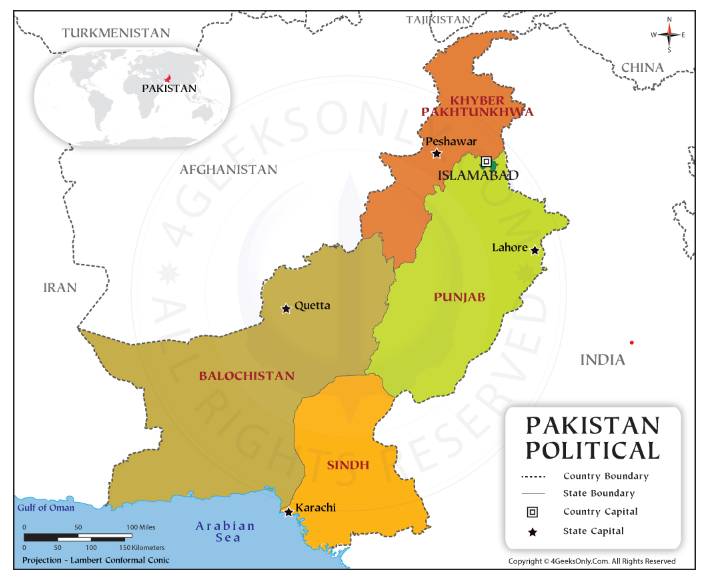

In [12]:
from typing import Dict, List, Optional

class MapColoringConstraint(Constraint[str, str]):
    def __init__(self, place1: str, place2: str) -> None:
        super().__init__([place1, place2])
        self.place1: str = place1
        self.place2: str = place2

    def satisfied(self, assignment: Dict[str, str]) -> bool:
        # If either place is not in the assignment then it is not
        # yet possible for their colors to be conflicting
        if self.place1 not in assignment or self.place2 not in assignment:
            return True
        # check the color assigned to place1 is not the same as the
        # color assigned to place2
        return assignment[self.place1] != assignment[self.place2]


if __name__ == "__main__":
    variables: List[str] = ["Punjab", "Sindh", "Balochistan", "KPK"]
    domains: Dict[str, List[str]] = {}
    for variable in variables:
        domains[variable] = ["red", "green", "blue"]
    csp: CSP[str, str] = CSP(variables, domains)
    csp.add_constraint(MapColoringConstraint("Balochistan", "Punjab"))
    csp.add_constraint(MapColoringConstraint("Balochistan", "Sindh"))
    csp.add_constraint(MapColoringConstraint("Balochistan", "KPK"))
    csp.add_constraint(MapColoringConstraint("Punjab", "Sindh"))
    csp.add_constraint(MapColoringConstraint("Punjab", "KPK"))
    
    solution: Optional[Dict[str, str]] = csp.backtracking_search()
    if solution is None:
        print("No solution found!")
    else:
        print(solution)
     

{'Punjab': 'red', 'Sindh': 'green', 'Balochistan': 'blue', 'KPK': 'green'}


# **4 Queens Problem using GA**

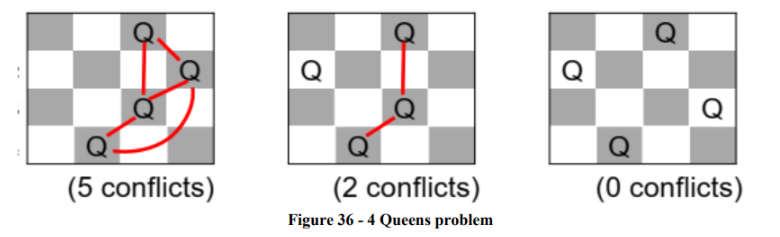

In [13]:
from typing import Dict, List, Optional


class QueensConstraint(Constraint[int, int]):
    def __init__(self, columns: List[int]) -> None:
        super().__init__(columns)
        self.columns: List[int] = columns

    def satisfied(self, assignment: Dict[int, int]) -> bool:
        # q1c = queen 1 column, q1r = queen 1 row
        for q1c, q1r in assignment.items():
            # q2c = queen 2 column
            for q2c in range(q1c + 1, len(self.columns) + 1):
                if q2c in assignment:
                    q2r: int = assignment[q2c] # q2r = queen 2 row
                    if q1r == q2r: # same row?
                        return False
                    if abs(q1r - q2r) == abs(q1c - q2c): # same diagonal?
                        return False
        return True # no conflict


if __name__ == "__main__":
    columns: List[int] = [1, 2, 3, 4]
    rows: Dict[int, List[int]] = {}
    for column in columns:
        rows[column] = [1, 2, 3, 4]
    csp: CSP[int, int] = CSP(columns, rows)
    csp.add_constraint(QueensConstraint(columns))
    solution: Optional[Dict[int, int]] = csp.backtracking_search()
    if solution is None:
        print("No solution found!")
    else:
        print(solution)

{1: 2, 2: 4, 3: 1, 4: 3}


In [15]:
# 8 queens problem
# From Classic Computer Science Problems in Python Chapter 3
# Copyright 2018 David Kopec
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#from csp import Constraint, CSP
from typing import Dict, List, Optional


class QueensConstraint(Constraint[int, int]):
    def __init__(self, columns: List[int]) -> None:
        super().__init__(columns)
        self.columns: List[int] = columns

    def satisfied(self, assignment: Dict[int, int]) -> bool:
        # q1c = queen 1 column, q1r = queen 1 row
        for q1c, q1r in assignment.items():
            # q2c = queen 2 column
            for q2c in range(q1c + 1, len(self.columns) + 1):
                if q2c in assignment:
                    q2r: int = assignment[q2c] # q2r = queen 2 row
                    if q1r == q2r: # same row?
                        return False
                    if abs(q1r - q2r) == abs(q1c - q2c): # same diagonal?
                        return False
        return True # no conflict


if __name__ == "__main__":
    columns: List[int] = [1, 2, 3, 4, 5, 6, 7, 8]
    rows: Dict[int, List[int]] = {}
    for column in columns:
        rows[column] = [1, 2, 3, 4, 5, 6, 7, 8]
    csp: CSP[int, int] = CSP(columns, rows)
    csp.add_constraint(QueensConstraint(columns))
    solution: Optional[Dict[int, int]] = csp.backtracking_search()
    if solution is None:
        print("No solution found!")
    else:
        print(solution)

{1: 1, 2: 5, 3: 8, 4: 6, 5: 3, 6: 7, 7: 2, 8: 4}


In [16]:
# send_more_money.py
# From Classic Computer Science Problems in Python Chapter 3
# Copyright 2018 David Kopec
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#from csp import Constraint, CSP
from typing import Dict, List, Optional


class SendMoreMoneyConstraint(Constraint[str, int]):
    def __init__(self, letters: List[str]) -> None:
        super().__init__(letters)
        self.letters: List[str] = letters

    def satisfied(self, assignment: Dict[str, int]) -> bool:
        # if there are duplicate values then it's not a solution
        if len(set(assignment.values())) < len(assignment):
            return False

        # if all variables have been assigned, check if it adds correctly
        if len(assignment) == len(self.letters):
            s: int = assignment["S"]
            e: int = assignment["E"]
            n: int = assignment["N"]
            d: int = assignment["D"]
            m: int = assignment["M"]
            o: int = assignment["O"]
            r: int = assignment["R"]
            y: int = assignment["Y"]
            send: int = s * 1000 + e * 100 + n * 10 + d
            more: int = m * 1000 + o * 100 + r * 10 + e
            money: int = m * 10000 + o * 1000 + n * 100 + e * 10 + y
            return send + more == money
        return True # no conflict


if __name__ == "__main__":
    letters: List[str] = ["S", "E", "N", "D", "M", "O", "R", "Y"]
    possible_digits: Dict[str, List[int]] = {}
    for letter in letters:
        possible_digits[letter] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    possible_digits["M"] = [1]  # so we don't get answers starting with a 0
    csp: CSP[str, int] = CSP(letters, possible_digits)
    csp.add_constraint(SendMoreMoneyConstraint(letters))
    solution: Optional[Dict[str, int]] = csp.backtracking_search()
    if solution is None:
        print("No solution found!")
    else:
        print(solution)
     

{'S': 9, 'E': 5, 'N': 6, 'D': 7, 'M': 1, 'O': 0, 'R': 8, 'Y': 2}


In [17]:
# word_search.py
# From Classic Computer Science Problems in Python Chapter 3
# Copyright 2018 David Kopec
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
from typing import NamedTuple, List, Dict, Optional
from random import choice
from string import ascii_uppercase
#from csp import CSP, Constraint

Grid = List[List[str]]  # type alias for grids


class GridLocation(NamedTuple):
    row: int
    column: int


def generate_grid(rows: int, columns: int) -> Grid:
    # initialize grid with random letters
    return [[choice(ascii_uppercase) for c in range(columns)] for r in range(rows)]


def display_grid(grid: Grid) -> None:
    for row in grid:
        print("".join(row))


def generate_domain(word: str, grid: Grid) -> List[List[GridLocation]]:
    domain: List[List[GridLocation]] = []
    height: int = len(grid)
    width: int = len(grid[0])
    length: int = len(word)
    for row in range(height):
        for col in range(width):
            columns: range = range(col, col + length)
            rows: range = range(row, row + length)
            if col + length <= width:
                # left to right
                domain.append([GridLocation(row, c) for c in columns])
                # diagonal towards bottom right
                if row + length <= height:
                    domain.append([GridLocation(r, col + (r - row)) for r in rows])
            if row + length <= height:
                # top to bottom
                domain.append([GridLocation(r, col) for r in rows])
                # diagonal towards bottom left
                if col - length >= 0:
                    domain.append([GridLocation(r, col - (r - row)) for r in rows])
    return domain


class WordSearchConstraint(Constraint[str, List[GridLocation]]):
    def __init__(self, words: List[str]) -> None:
        super().__init__(words)
        self.words: List[str] = words

    def satisfied(self, assignment: Dict[str, List[GridLocation]]) -> bool:
        # if there are any duplicates grid locations then there is an overlap
        all_locations = [locs for values in assignment.values() for locs in values]
        return len(set(all_locations)) == len(all_locations)


if __name__ == "__main__":
    grid: Grid = generate_grid(9, 9)
    words: List[str] = ["MATTHEW", "JOE", "MARY", "SARAH", "SALLY"]
    locations: Dict[str, List[List[GridLocation]]] = {}
    for word in words:
        locations[word] = generate_domain(word, grid)
    csp: CSP[str, List[GridLocation]] = CSP(words, locations)
    csp.add_constraint(WordSearchConstraint(words))
    solution: Optional[Dict[str, List[GridLocation]]] = csp.backtracking_search()
    if solution is None:
        print("No solution found!")
    else:
        for word, grid_locations in solution.items():
            # random reverse half the time
            if choice([True, False]):
                grid_locations.reverse()
            for index, letter in enumerate(word):
                (row, col) = (grid_locations[index].row, grid_locations[index].column)
                grid[row][col] = letter
        display_grid(grid)


WEHTTAMJM
SARAHSKOA
VSYUBAJER
GZRMLLSDY
WFPHTLOBA
EAIUQYUQV
ZZRFCEBRI
KEWCKQCFW
ALFPVTGDJ
